In [1]:
import pandas as pd

In [2]:
results = pd.read_csv("model_comparison_results.csv")

In [3]:
results_densenet121 = pd.read_csv("model_comparison_results_densenet121.csv")

In [4]:
results_densenet169 = pd.read_csv("model_comparison_results_densenet169.csv")

In [5]:
results_resnet_inception = pd.read_csv("model_comparison_results_resnet_inception.csv")

In [6]:
results_vgg = pd.read_csv("model_comparison_results_vgg.csv")

In [7]:
combined_results = pd.concat([results, results_densenet121, results_densenet169, results_resnet_inception, results_vgg], ignore_index=True)

In [8]:
combined_results = combined_results.sort_values('final_test_accuracies', ascending=False)

In [26]:
print(combined_results[["model_names", "final_test_times", "final_test_accuracies"]].to_string(index=False))

         model_names  final_test_times  final_test_accuracies
vit_base_patch16_224         41.202680              89.678135
               vgg19         23.900229              85.016648
   mobilenetv3_large          7.594401              81.576027
     wide_resnet50_2         21.918634              81.243063
         densenet121         13.502360              81.132075
            resnet50         14.990104              81.132075
         densenet169         30.202281              80.910100
   mobilenetv3_small          7.039773              80.355161
     efficientnet_b0          9.225342              79.911210
        mobilenet_v2         17.403268              77.913430
 inception_resnet_v2         31.064226              77.580466
        inception_v3         16.084767              76.137625


In [10]:
combined_results.to_csv('final_comparison_results.csv', index=False)

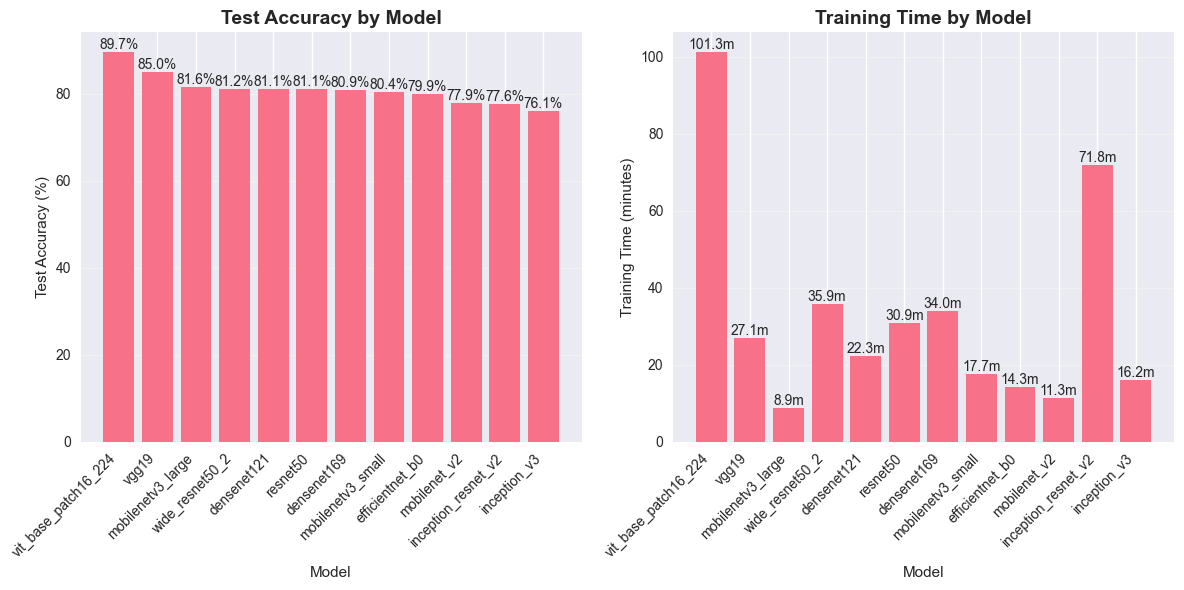

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# 1. Model Performance Comparison - Bar Chart
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
bars = plt.bar(combined_results['model_names'], combined_results['final_test_accuracies'])
plt.title('Test Accuracy by Model', fontsize=14, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Test Accuracy (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}%', ha='center', va='bottom')

# 2. Training Time Comparison
plt.subplot(1, 2, 2)
bars = plt.bar(combined_results['model_names'], combined_results['train_times']/60)  # Convert to minutes
plt.title('Training Time by Model', fontsize=14, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Training Time (minutes)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}m', ha='center', va='bottom')

plt.tight_layout()
plt.show()

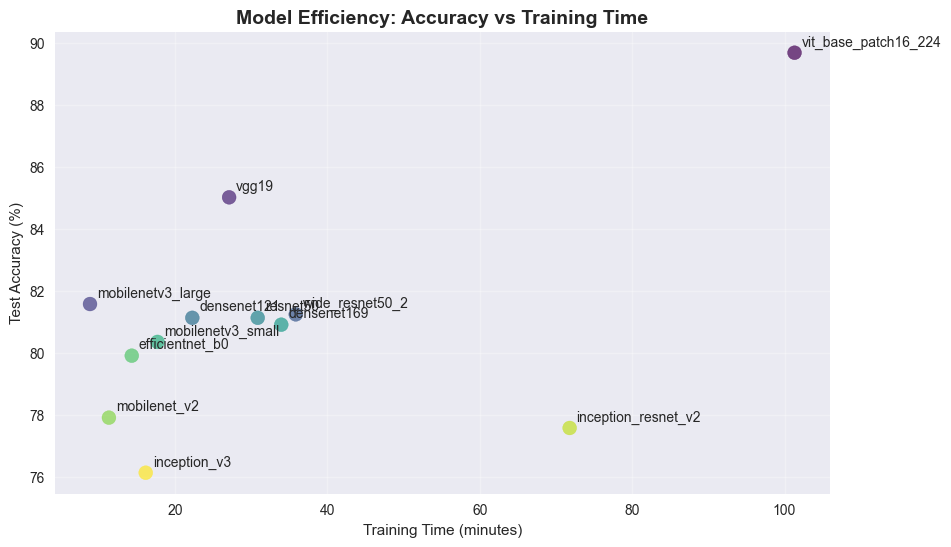

In [12]:
# 3. Accuracy vs Training Time Scatter Plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(combined_results['train_times']/60, 
                     combined_results['final_test_accuracies'],
                     s=100, alpha=0.7, c=range(len(combined_results)), cmap='viridis')

# Add model labels
for i, model in enumerate(combined_results['model_names']):
    plt.annotate(model, 
                (combined_results['train_times'].iloc[i]/60, 
                 combined_results['final_test_accuracies'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', fontsize=10)

plt.xlabel('Training Time (minutes)')
plt.ylabel('Test Accuracy (%)')
plt.title('Model Efficiency: Accuracy vs Training Time', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

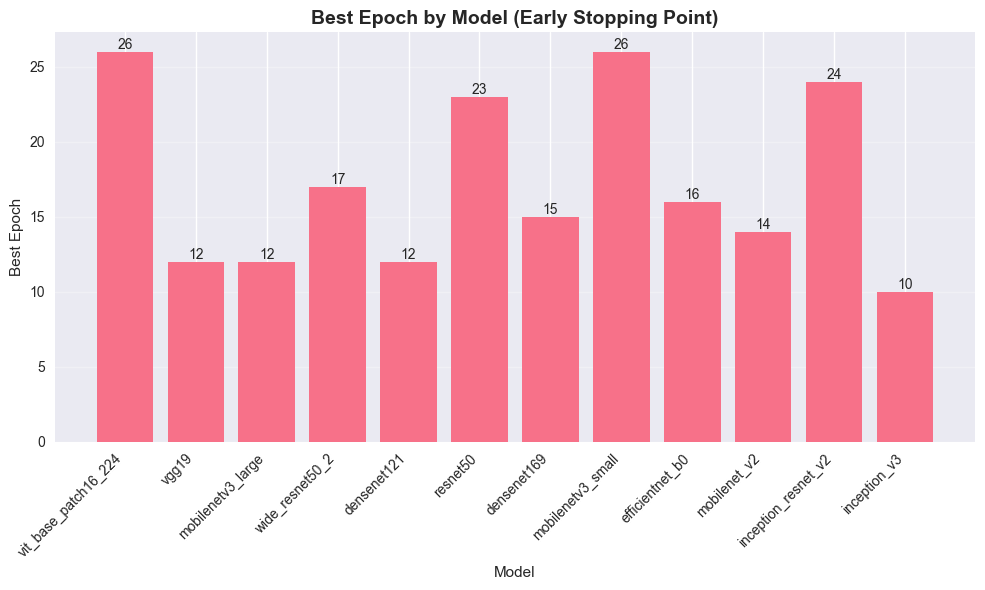

In [15]:
# 6. Best Epoch Analysis
plt.figure(figsize=(10, 6))
bars = plt.bar(combined_results['model_names'], combined_results['best_epochs'])
plt.title('Best Epoch by Model (Early Stopping Point)', fontsize=14, fontweight='bold')
plt.xlabel('Model')
plt.ylabel('Best Epoch')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

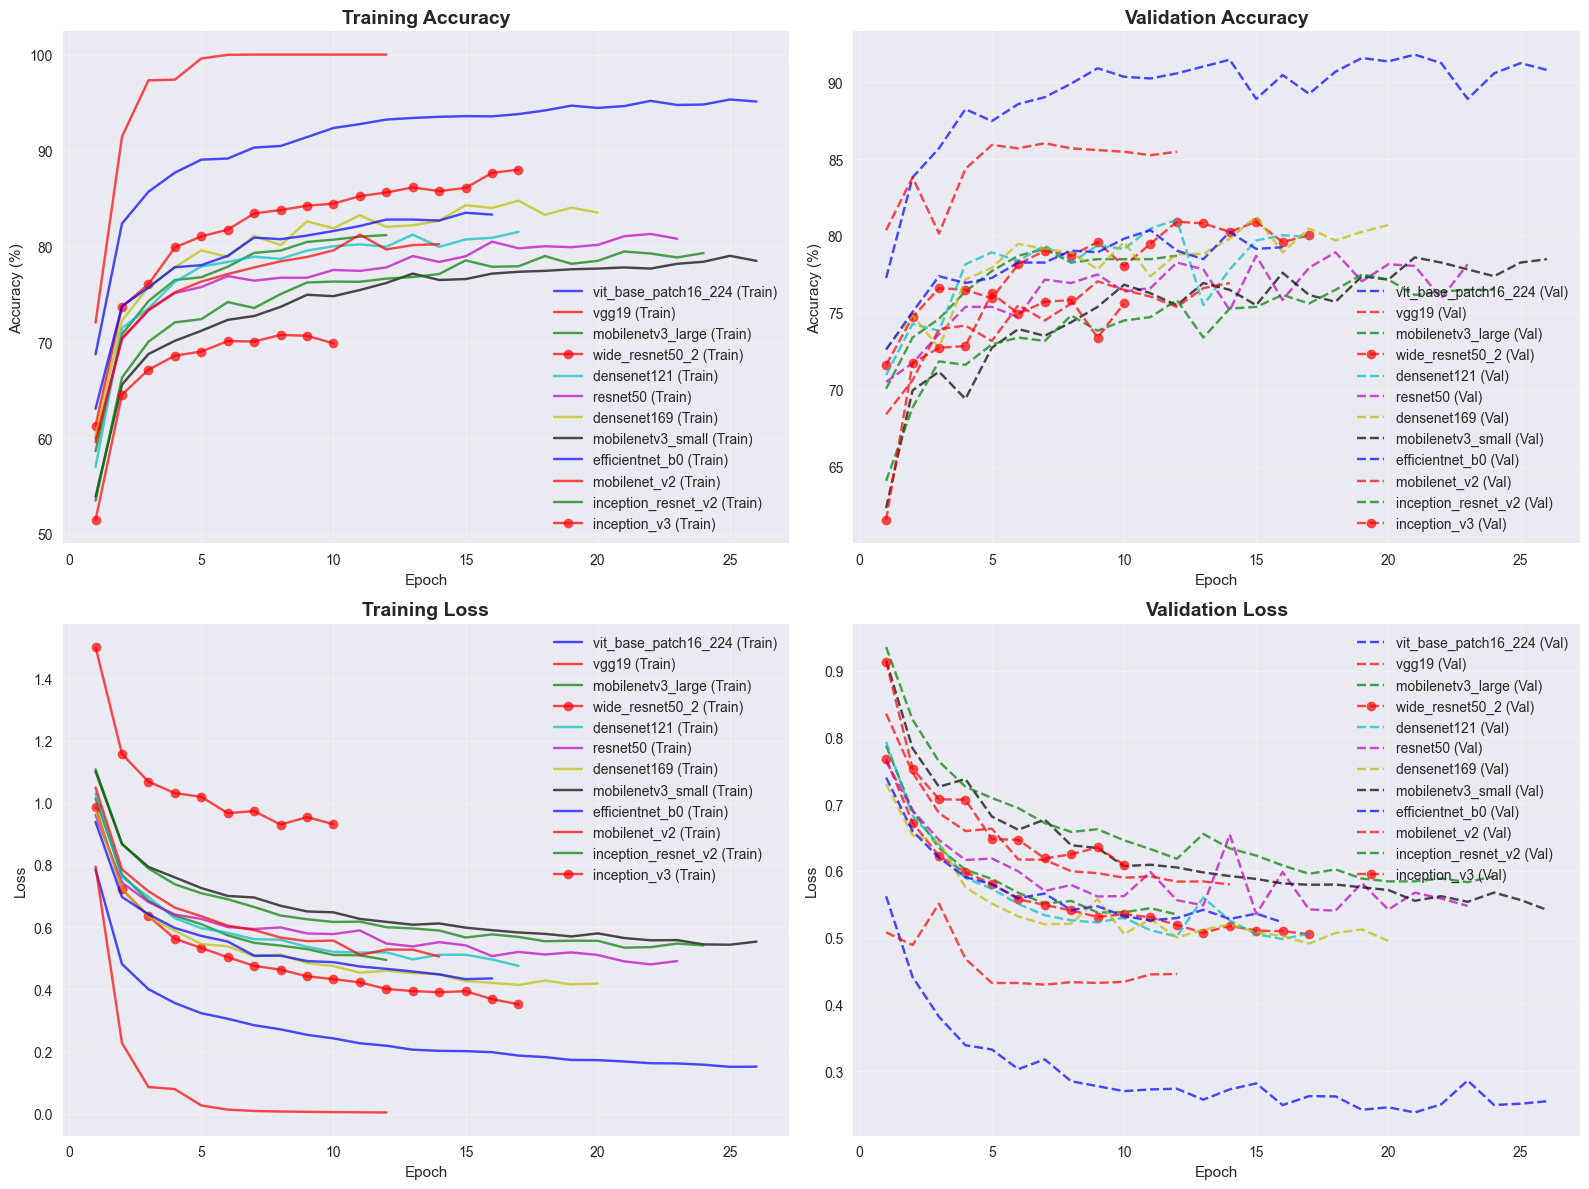

In [21]:
import ast
import json

# Function to safely parse history data from CSV
def parse_history(history_str):
    try:
        # Try parsing as JSON first
        return json.loads(history_str)
    except:
        try:
            # Try parsing as Python literal
            return ast.literal_eval(history_str)
        except:
            return []

# Function to plot training history for all models
def plot_all_training_histories(combined_results):
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Colors for different models
    colors = ['b', 'r', 'g', 'or', 'c', 'm', 'y', 'k']
    
    for i, (idx, row) in enumerate(combined_results.iterrows()):
        model_name = row['model_names']
        color = colors[i % len(colors)]
        
        # Parse history data
        train_acc = parse_history(row['train_acc_history'])
        val_acc = parse_history(row['val_acc_history'])
        train_loss = parse_history(row['train_loss_history'])
        val_loss = parse_history(row['val_loss_history'])
        
        if len(train_acc) > 0:  # Only plot if history data exists
            epochs = range(1, len(train_acc) + 1)
            
            # Training and Validation Accuracy
            axes[0, 0].plot(epochs, train_acc, f'{color}-', label=f'{model_name} (Train)', alpha=0.7)
            axes[0, 1].plot(epochs, val_acc, f'{color}--', label=f'{model_name} (Val)', alpha=0.7)
            
            # Training and Validation Loss
            axes[1, 0].plot(epochs, train_loss, f'{color}-', label=f'{model_name} (Train)', alpha=0.7)
            axes[1, 1].plot(epochs, val_loss, f'{color}--', label=f'{model_name} (Val)', alpha=0.7)
    
    # Customize plots
    axes[0, 0].set_title('Training Accuracy', fontsize=14, fontweight='bold')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Accuracy (%)')
    axes[0, 0].grid(True, alpha=0.3)
    axes[0, 0].legend()
    
    axes[0, 1].set_title('Validation Accuracy', fontsize=14, fontweight='bold')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Accuracy (%)')
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].legend()
    
    axes[1, 0].set_title('Training Loss', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Loss')
    axes[1, 0].grid(True, alpha=0.3)
    axes[1, 0].legend()
    
    axes[1, 1].set_title('Validation Loss', fontsize=14, fontweight='bold')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Loss')
    axes[1, 1].grid(True, alpha=0.3)
    axes[1, 1].legend()
    
    plt.tight_layout()
    plt.show()

# Plot all training histories
plot_all_training_histories(combined_results)